In [2]:
year = 2023
day = 16

In [117]:
from aocd import submit
from aocd.models import Puzzle
from functools import reduce
import numpy as np

puzzle = Puzzle(year=year, day=day)
data = puzzle.input_data
# data = puzzle.examples[0].input_data

data = data.strip()
data = data.split("\n")
data = [list(line) for line in data]
data = np.array(data)

H, W = data.shape

headings = {
    "N": (-1, 0),
    "S": (1, 0),
    "E": (0, 1),
    "W": (0, -1),
}

data[:5, :5]

array([['\\', '.', '.', '/', '.'],
       ['.', '-', '.', '.', '.'],
       ['.', '\\', '.', '.', '.'],
       ['.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.']], dtype='<U1')

In [121]:
def trace(loc, h):
    energized = [(loc, h)]
    visited = {(loc, h)}
    while True:
        new = []
        for loc, h in energized:
            y, x = loc
            new_headings = []

            if data[y, x] == ".":
                new_headings.append(h)

            elif data[y, x] == "|":
                if h in "EW":
                    new_headings.append("N")
                    new_headings.append("S")
                else:
                    new_headings.append(h)

            elif data[y, x] == "-":
                if h in "NS":
                    new_headings.append("E")
                    new_headings.append("W")
                else:
                    new_headings.append(h)

            elif data[y, x] == "/":
                if h == "N":
                    new_headings.append("E")
                elif h == "S":
                    new_headings.append("W")
                elif h == "E":
                    new_headings.append("N")
                elif h == "W":
                    new_headings.append("S")

            elif data[y, x] == "\\":
                if h == "N":
                    new_headings.append("W")
                elif h == "S":
                    new_headings.append("E")
                elif h == "E":
                    new_headings.append("S")
                elif h == "W":
                    new_headings.append("N")

            for h in new_headings:
                d_y, d_x = headings[h]
                if y + d_y < 0 or y + d_y >= H or x + d_x < 0 or x + d_x >= W:
                    continue
                new.append(((y + d_y, x + d_x), h))

        energized = [n for n in new if n not in visited]
        visited.update(new)
        if not energized:
            return visited


In [122]:
def compute_score(v):
    return len(set(l for l, h in v))

answer = compute_score(trace((0, 0), "E"))
submit(answer, part="a", year=year, day=day)

aocd will not submit that answer again. At 2023-12-16 00:35:58.968578-05:00 you've previously submitted 7236 and the server responded with:
That's the right answer!  You are one gold star closer to restoring snow operations. [Continue to Part Two]


In [123]:
scores = []
for y in range(H):
    x = 0
    h = "E"
    scores.append(compute_score(trace((y, x), h)))
    x = W - 1
    h = "W"
    scores.append(compute_score(trace((y, x), h)))

for x in range(W):
    y = 0
    h = "S"
    scores.append(compute_score(trace((y, x), h)))
    y = H - 1
    h = "N"
    scores.append(compute_score(trace((y, x), h)))

submit(max(scores), part="b", year=year, day=day)

Part b already solved with same answer: 7521


In [124]:
vis = np.zeros(data.shape)
for loc, h in trace((0, 0), "E"):
    y, x = loc
    if y < 0 or y >= H or x < 0 or x >= W:
        continue
    vis[y, x] = 1

vis

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

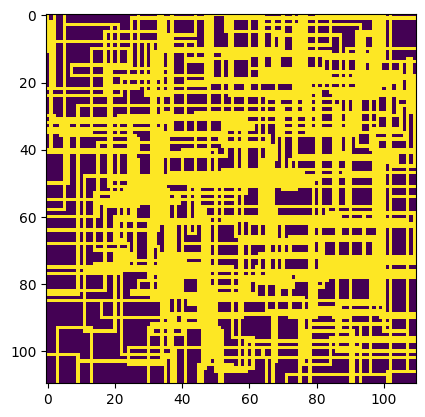

In [125]:
from matplotlib.pyplot import imshow

imshow(vis)